In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Diamond_Prices.csv")
df.head()

,price,carat,cut,color,clarity,table,length,width,depth
0,1053,0.48,Very Good,I,VS1,55.0,4.99,5.03,3.12
1,584,0.34,Premium,D,SI1,58.0,4.43,4.47,2.76
2,9005,1.04,Ideal,F,VVS2,57.0,6.50,6.53,3.99
3,2056,0.70,Premium,G,SI2,61.0,5.66,5.63,3.49
4,9407,1.57,Very Good,H,VS2,56.0,7.46,7.40,4.71


In [4]:
df.shape

(500, 9)

In [5]:
df.isna().sum()

price      0
carat      0
cut        0
color      0
clarity    0
table      0
length     0
width      0
depth      0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(500, 9)

In [8]:
df.columns

Index(['price', 'carat', 'cut', 'color', 'clarity', 'table', 'length', 'width',
       'depth'],
      dtype='object')

In [9]:
cat_col = ['cut', 'color', 'clarity']
for i in cat_col:
    print(df[i].unique())

['Very Good' 'Premium' 'Ideal' 'Fair' 'Good']
['I' 'D' 'F' 'G' 'H' 'E' 'J']
['VS1' 'SI1' 'VVS2' 'SI2' 'VS2' 'VVS1' 'I1' 'IF']


In [10]:
df.dtypes

price        int64
carat      float64
cut         object
color       object
clarity     object
table      float64
length     float64
width      float64
depth      float64
dtype: object

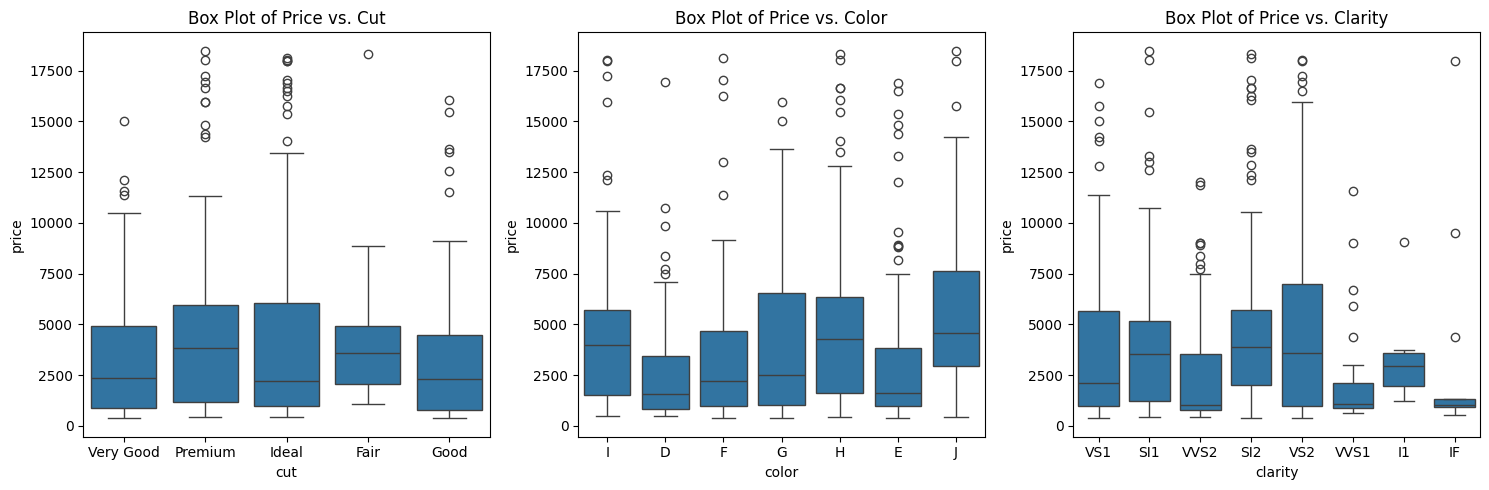

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.boxplot(x='cut', y='price', data=df)
plt.title('Box Plot of Price vs. Cut')
plt.subplot(132)
sns.boxplot(x='color', y='price', data=df)
plt.title('Box Plot of Price vs. Color')
plt.subplot(133)
sns.boxplot(x='clarity', y='price', data=df)
plt.title('Box Plot of Price vs. Clarity')
plt.tight_layout()
plt.show()

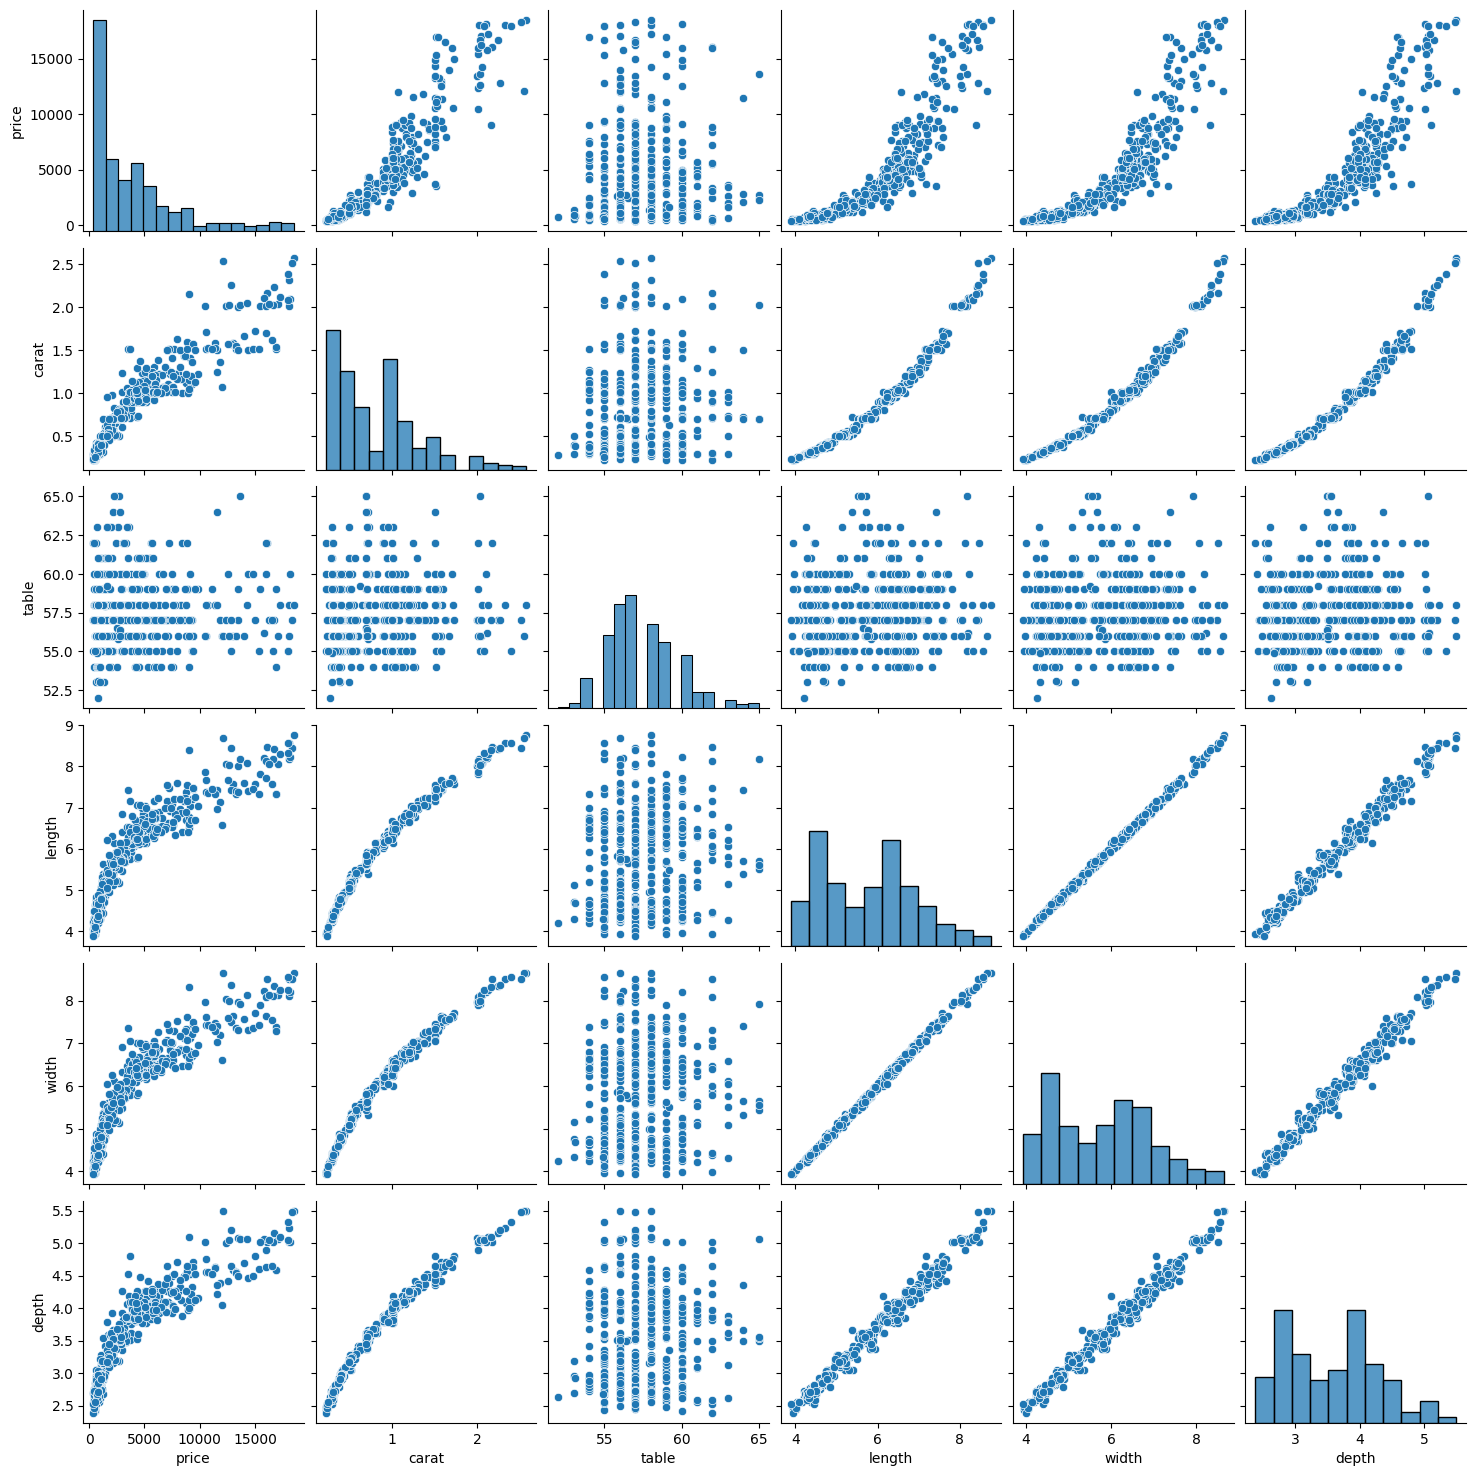

In [13]:
columns_of_interest = ['price', 'carat', 'table', 'length', 'width', 'depth']
sns.pairplot(df[columns_of_interest], kind='scatter')
plt.show()

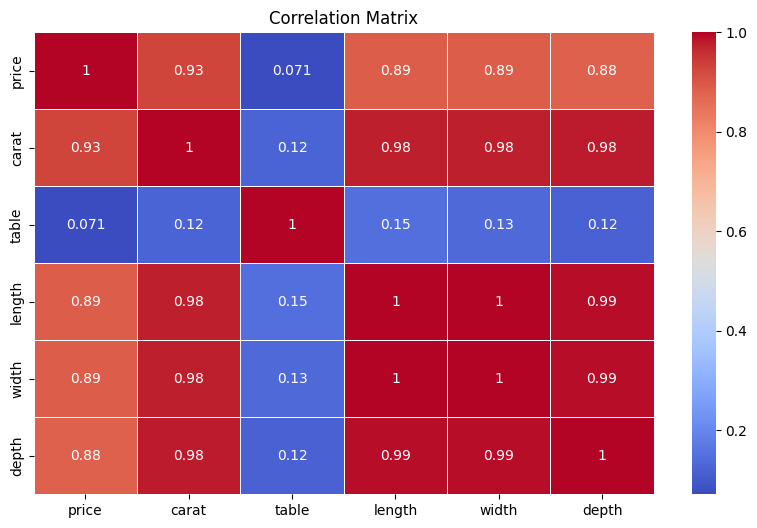

In [14]:
columns_of_interest = ['price', 'carat', 'table', 'length', 'width', 'depth']
correlation_matrix = df[columns_of_interest].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

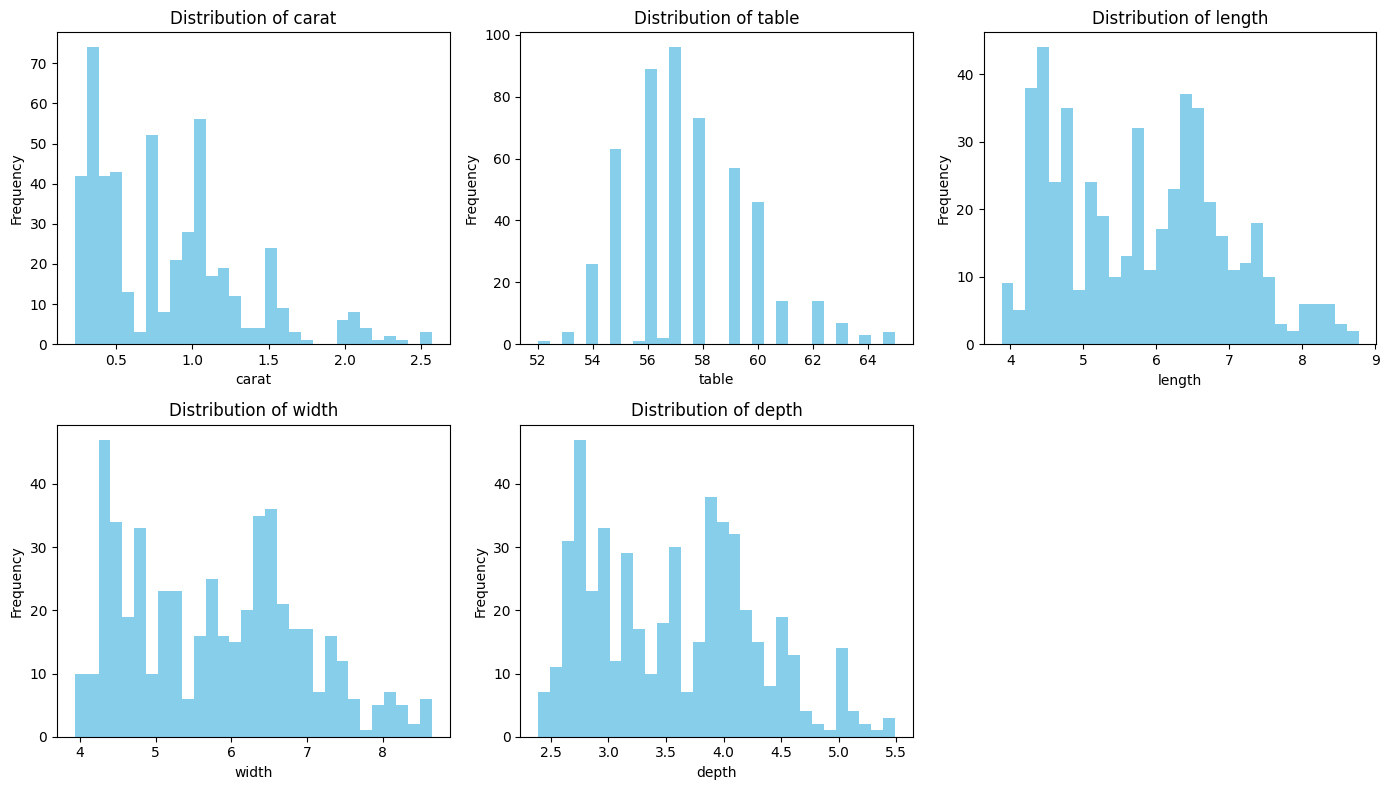

In [15]:
numerical_columns = ['carat', 'table', 'length', 'width', 'depth']
plt.figure(figsize=(14, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[column], bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

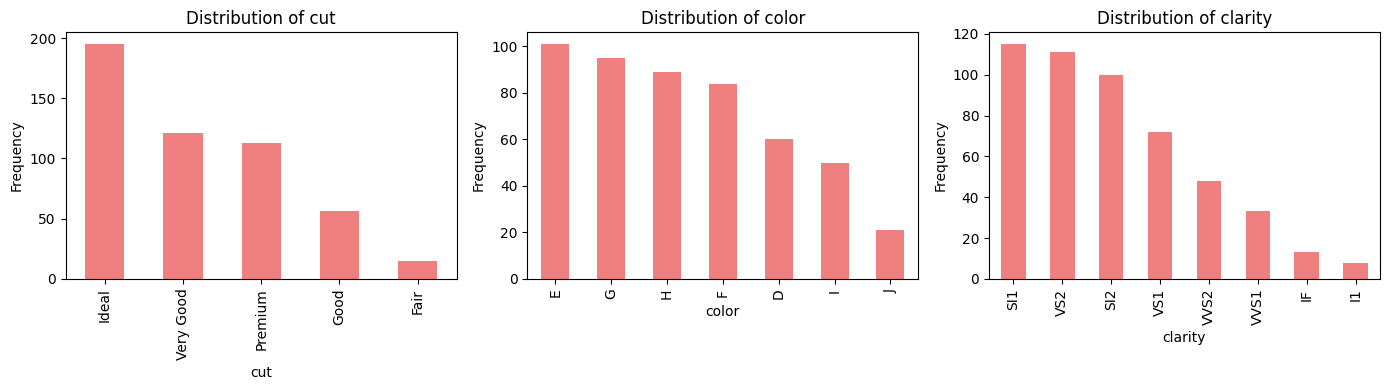

In [16]:
categorical_columns = ['cut', 'color', 'clarity']
plt.figure(figsize=(14, 4))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    df[column].value_counts().plot(kind='bar', color='lightcoral')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [12]:
num_cols = ['carat','table', 'length', 'width','depth']
cat_cols = ['cut', 'color', 'clarity']

In [13]:
num_pipe = Pipeline([
    ("imputer",SimpleImputer(strategy="mean")),
    ('scaler',StandardScaler(with_mean=False))
])
cat_pipe = Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ('one_hot',OneHotEncoder()),
    ('scaler',StandardScaler(with_mean=False))
])

In [14]:
preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(['price'],axis=1)
y = df['price']

In [22]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

In [23]:
len(ytrain)

400

In [29]:
ytest

99       798
398      680
360     4685
455     1076
453     4276
       ...  
294     5141
276     4362
433    14014
31      3461
458     6863
Name: price, Length: 100, dtype: int64

In [25]:
X_train_arr = preprocessor.fit_transform(Xtrain)
X_test_arr = preprocessor.transform(Xtest)

In [26]:
X_test_arr

array([[ 0.70894091, 24.83994762,  3.92321341, ...,  0.        ,
         0.        ,  3.45148362],
       [ 0.62791909, 24.40415907,  3.75038463, ...,  2.43414218,
         0.        ,  0.        ],
       [ 2.04580092, 26.58310184,  5.60829406, ...,  2.43414218,
         0.        ,  0.        ],
       ...,
       [ 3.38266092, 24.40415907,  6.56749382, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.14707819, 24.40415907,  5.63421838, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.14707819, 24.40415907,  5.59101119, ...,  0.        ,
         0.        ,  0.        ]])

In [54]:
scaler = StandardScaler()

# Fit and transform y_train
y_train_arr = scaler.fit_transform(np.array(ytrain).reshape(-1, 1))

# Transform y_test
y_test_arr = scaler.transform(np.array(ytest).reshape(-1, 1))

In [55]:
y_test_arr

array([[-0.81848424],
       [-0.84708225],
       [ 0.12355372],
       [-0.75110926],
       [ 0.0244301 ],
       [-0.74601978],
       [ 3.02140498],
       [-0.80563937],
       [-0.68349192],
       [ 0.90927202],
       [-0.03373536],
       [-0.82454314],
       [-0.61442045],
       [ 0.48078653],
       [-0.20096103],
       [-0.00416792],
       [-0.66579993],
       [ 0.50332564],
       [ 0.43304239],
       [-0.81412183],
       [ 1.13757142],
       [-0.34734408],
       [ 0.22946331],
       [ 0.22170792],
       [-0.80030753],
       [-0.78043434],
       [-0.34249696],
       [-0.791098  ],
       [-0.88682864],
       [ 1.17053184],
       [-0.86671309],
       [-0.81921131],
       [ 3.36264229],
       [-0.19417506],
       [-0.43943938],
       [ 3.08781053],
       [-0.42586744],
       [-0.63720191],
       [-0.45398074],
       [ 0.05108926],
       [-0.71378642],
       [-0.8049123 ],
       [-0.86792487],
       [-0.58679186],
       [ 0.09083565],
       [ 1

In [28]:
X_train = X_train_arr[:,0:]
y_train = X_train_arr[:,0]
X_test = X_test_arr[:,0:]
y_test = X_test_arr[:,0]

In [29]:
len(X_train),len(y_train),len(X_test),len(y_test)

(400, 400, 100, 100)

In [30]:
y_test

array([0.49418985, 2.26327414, 0.11080813, 0.2704103 , 0.26776629,
       0.78911735, 1.38810622, 0.1110485 , 1.52727739, 1.50276019,
       0.93285545, 1.07250735, 4.35637006, 0.17859098, 2.13636157,
       1.17033579, 1.55395787, 1.98445107, 1.52703702, 0.54851228,
       0.39011193, 1.43041041, 0.31559887, 0.27401577, 0.59778704,
       2.26111086, 3.68911762, 0.23579778, 2.57478681, 0.26896811,
       1.24292593, 0.1600829 , 0.1110485 , 3.85448854, 2.84784112,
       0.30983012, 1.57390814, 2.06689617, 1.02130967, 1.23715718,
       0.09085786, 1.09101543, 0.20118527, 2.65987592, 1.07659355,
       1.01938675, 1.09365945, 1.01121435, 0.58120188, 1.46814767,
       1.19317044, 0.2213759 , 1.56453392, 0.25550769, 1.36070464,
       0.12571075, 0.47111484, 1.15759646, 1.48040627, 0.80594288,
       3.78959007, 0.18964776, 1.39002914, 0.37520932, 1.82749292,
       0.25310404, 0.1600829 , 0.3439619 , 4.00014956, 0.52711982,
       0.14566102, 0.68239542, 0.48385417, 3.1946874 , 0.65908

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

In [30]:
param_grids = {
    "Linear Regression": {},
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"],
        "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1.0]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 4, 5]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "epsilon": [0.1, 0.2, 0.5]
    }
}

In [56]:
best_models = {}
scores = {}
for model_name,model in models.items():
    gs = GridSearchCV(model,param_grids[model_name],cv=5,n_jobs=-1)
    gs.fit(X_train_arr,y_train_arr)
    best_models[model_name] = gs.best_estimator_
    scores[model_name] = gs.best_score_

f:\projects\diamondPrice\venv2\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
f:\projects\diamondPrice\venv2\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\projects\diamondPrice\venv2\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\projects\diamondPrice\venv2\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [57]:
best_models

{'Linear Regression': LinearRegression(),
 'K-Nearest Neighbors': KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7, weights='distance'),
 'Random Forest': RandomForestRegressor(max_depth=30, min_samples_split=5),
 'AdaBoost': AdaBoostRegressor(),
 'Gradient Boosting': GradientBoostingRegressor(learning_rate=0.2, n_estimators=200),
 'Support Vector Machine': SVR(C=10, kernel='poly')}

In [58]:
scores

{'Linear Regression': 0.9243715764182839,
 'K-Nearest Neighbors': 0.695821832805255,
 'Random Forest': 0.9092183473332929,
 'AdaBoost': 0.8853727275442816,
 'Gradient Boosting': 0.9391788562862355,
 'Support Vector Machine': 0.9327637566519116}

In [35]:
linear_regression = best_models["Linear Regression"]
knn = best_models["K-Nearest Neighbors"]
random_forest = best_models["Random Forest"]
adaboost = best_models["AdaBoost"]
gradient_boosting = best_models["Gradient Boosting"]
svr = best_models["Support Vector Machine"]

In [37]:
y_pred_lr = linear_regression.predict(X_test_arr)
y_pred_knn = knn.predict(X_test_arr)
y_pred_rf = random_forest.predict(X_test_arr)
y_pred_ab = adaboost.predict(X_test_arr)
y_pred_gb = gradient_boosting.predict(X_test_arr)
y_pred_svr = svr.predict(X_test_arr)

In [38]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [40]:
mean_absolute_error(ytest,y_pred_lr),mean_squared_error(ytest,y_pred_lr),r2_score(ytest,y_pred_lr)

(749.185, 1320743.6625, 0.9339898644039614)

In [41]:
mean_absolute_error(ytest,y_pred_knn),mean_squared_error(ytest,y_pred_knn),r2_score(ytest,y_pred_knn)

(1322.9421844540002, 4635295.843972581, 0.7683301340933868)

In [42]:
mean_absolute_error(ytest,y_pred_rf),mean_squared_error(ytest,y_pred_rf),r2_score(ytest,y_pred_rf)

(622.0416, 1260008.400778, 0.93702538369174)

In [43]:
mean_absolute_error(ytest,y_pred_ab),mean_squared_error(ytest,y_pred_ab),r2_score(ytest,y_pred_ab)

(854.0092177334075, 1585967.615308595, 0.9207340982887765)

In [44]:
mean_absolute_error(ytest,y_pred_gb),mean_squared_error(ytest,y_pred_gb),r2_score(ytest,y_pred_gb)

(535.2537212263054, 927884.8747940658, 0.9536247584283453)

In [45]:
mean_absolute_error(y_test,y_pred_svr),mean_squared_error(y_test,y_pred_svr),r2_score(y_test,y_pred_svr)

(0.05452654304148759, 0.004199402313701989, 0.9960854020628016)

In [48]:
import pickle
with open(r"F:\projects\diamondPrice\artifacts\model3.pkl", "wb") as file_obj:
            pickle.dump(random_forest, file_obj)

In [46]:
with open(r"F:\projects\diamondPrice\artifacts\preprocessor1.pkl", "wb") as file_ob:
            pickle.dump(preprocessor, file_ob)